<a href="https://colab.research.google.com/github/kawthar-mohammed/Usecase-7/blob/main/EDA__Usecase_7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore



from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [ ]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv('final_data.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [ ]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data.

In [ ]:
# !pip install ydata-profiling


In [ ]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="player Profiling Report")

# profile.to_notebook_iframe()
# profile.to_file("player Profiling Report")

after generating profile report I undersatend that:

1-the current value of the player is highly correlated with the apperance,highest_value and minutes played.

2- assists and goals is highly correlated with each other.

3-goals conceded is highly overall correlated with clean sheets

4-games_injured is highly overall correlated with days_injured and highest_value.

### Data Quality Checks



#### 1. Reliability:
This dataset was generated by scraping data from Transfermarkt.

#### 2. Timeliness:
the dataset collectiog time is compatiable with spesified period.

#### 3. Consistency:



#### 4. Relevance:
the dataset sample is relevance with analysis opjective

#### 5. Uniqueness:
the dataset does not have duplicated values


#### 6. Completeness:
the datasset is complete

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

#### 7. Check Accuracy
the data type for each columns is appropriate.

as I have low knowledge of football I will deal with outlier on the selected feature.

In [ ]:
# check outliers
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [ ]:
#delete columns.
df.drop(columns = ['player', 'name'],inplace = True)

In [ ]:
df['position'].value_counts()

,count
position,
Defender Centre-Back,1821
Attack Centre-Forward,1353
Goalkeeper,1229
midfield-CentralMidfield,1149
midfield-DefensiveMidfield,900
Defender Right-Back,867
Defender Left-Back,807
midfield-AttackingMidfield,769
Attack-RightWinger,717


In [ ]:
df['team'].value_counts()

,count
team,
Daejeon Hana Citizen,46
Jeonbuk Hyundai Motors,46
FC Seoul,45
Gangwon FC,43
Daegu FC,42
...,...
FC Barcelona,22
Atlético de Madrid,22
CA Osasuna,22


In [ ]:
df['position_encoded'].value_counts()
# we have position column that show same fact with more readable value

,count
position_encoded,
2,3528
3,3095
4,2902
1,1229


In [ ]:
df.drop(columns = ['position_encoded'],inplace = True)

In [ ]:
df.columns

Index(['team', 'position', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'winger'],
      dtype='object')

In [ ]:

import plotly.express as px

cols_for_heatmap = ['height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'winger']
df_heatmap = df[cols_for_heatmap]


fig = px.imshow(df_heatmap.corr(), color_continuous_scale='RdBu')
fig.update_xaxes(side="top")
fig.show()


'highest_value', 'appearance', 'minutes played', 'award', 'assists', 'goals' and 'position_encoded' is highly correlaed with current_value.

In [ ]:
#one hot encoding
df = pd.get_dummies(df, columns=['position','team'])

In [ ]:
df.shape


(10754, 407)

In [ ]:
# Calculate the 35th and 75th percentiles of the price
p35 = df['current_value'].quantile(0.35)
p75 = df['current_value'].quantile(0.75)

# Function to categorize prices
def categorize_price(current_value):
    if current_value < p35:
        return 'Cheap_Price'
    elif current_value < p75:
        return 'Good_Price'
    else:
        return 'High_Price'

# Apply the function to create a new column
df['current_value_category'] = df['current_value'].apply(categorize_price)

df.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(df['current_value_category'].value_counts())

current_value_category
Good_Price     4310
Cheap_Price    3754
High_Price     2690
Name: count, dtype: int64


In [ ]:
encoder = LabelEncoder()
df['current_value_category'] = encoder.fit_transform(df['current_value_category'])

In [ ]:
correlation = df.corr()
print(correlation['current_value_category'].sort_values(ascending=False))

current_value_category    1.000000
appearance                0.546979
minutes played            0.519476
highest_value             0.488265
award                     0.242359
                            ...   
team_Royal AM FC         -0.067733
position_Attack          -0.082597
position_midfield        -0.096901
goals conceded           -0.128555
position_Goalkeeper      -0.172988
Name: current_value_category, Length: 407, dtype: float64


In [ ]:
# Set the correlation threshold
threshold = 0.0
# You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value_category']) > threshold]['current_value_category'].index
selected_features

Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
       ...
       'team_Western Sydney Wanderers', 'team_Western United FC',
       'team_Wigan Athletic', 'team_Wolfsberger AC',
       'team_Wolverhampton Wanderers', 'team_Yokohama F. Marinos',
       'team_Yokohama FC', 'team_Zenit St. Petersburg', 'team_Ümraniyespor',
       'current_value_category'],
      dtype='object', length=407)

In [ ]:
df = df[selected_features]
df.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,team_Western Sydney Wanderers,team_Western United FC,team_Wigan Athletic,team_Wolfsberger AC,team_Wolverhampton Wanderers,team_Yokohama F. Marinos,team_Yokohama FC,team_Zenit St. Petersburg,team_Ümraniyespor,current_value_category
0,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,...,False,False,False,False,False,False,False,False,False,2
1,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,...,False,False,False,False,False,False,False,False,False,1
2,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,...,False,False,False,False,False,False,False,False,False,1
3,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,2
4,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,2


In [ ]:
df.shape

(10754, 407)

In [ ]:
df.columns

Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
       ...
       'team_Western Sydney Wanderers', 'team_Western United FC',
       'team_Wigan Athletic', 'team_Wolfsberger AC',
       'team_Wolverhampton Wanderers', 'team_Yokohama F. Marinos',
       'team_Yokohama FC', 'team_Zenit St. Petersburg', 'team_Ümraniyespor',
       'current_value_category'],
      dtype='object', length=407)

In [ ]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,highest_value,winger,current_value_category
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,6.152606e+06,0.307513,0.901060
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,1.338988e+07,0.461485,0.767779
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,4.500000e+05,0.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,1.500000e+06,0.000000,1.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,5.000000e+06,1.000000,2.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,2.000000e+08,1.000000,2.000000


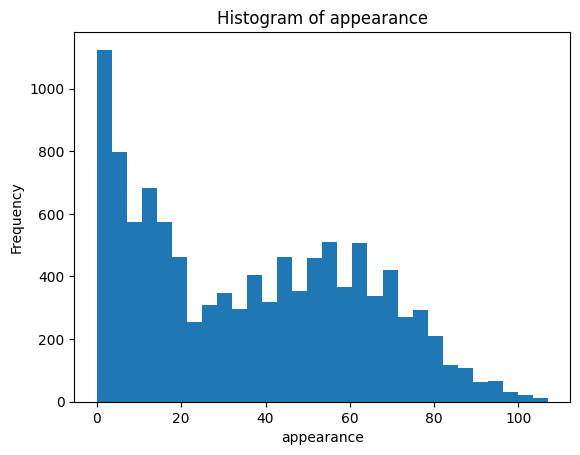

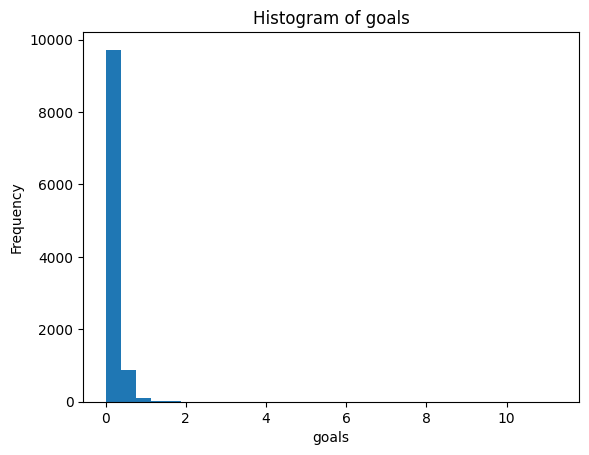

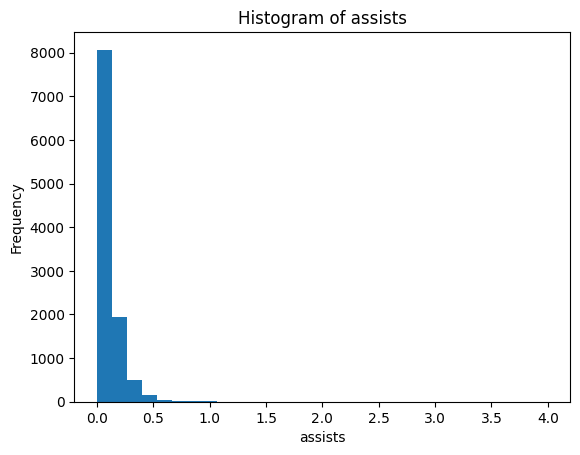

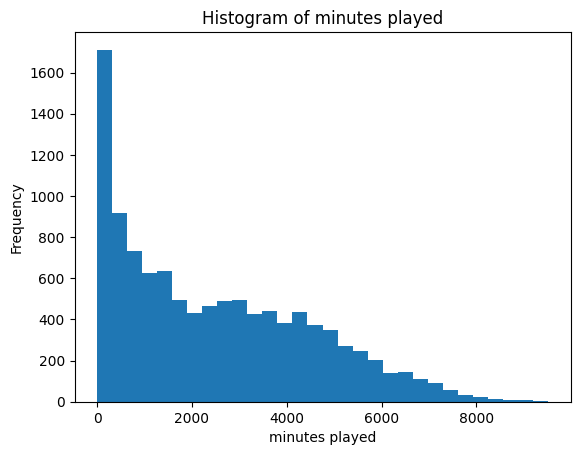

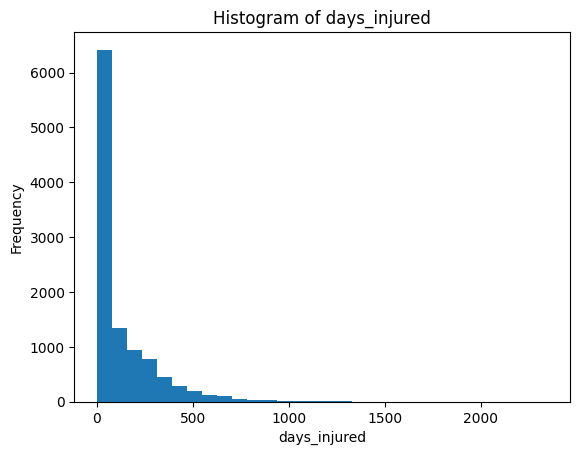

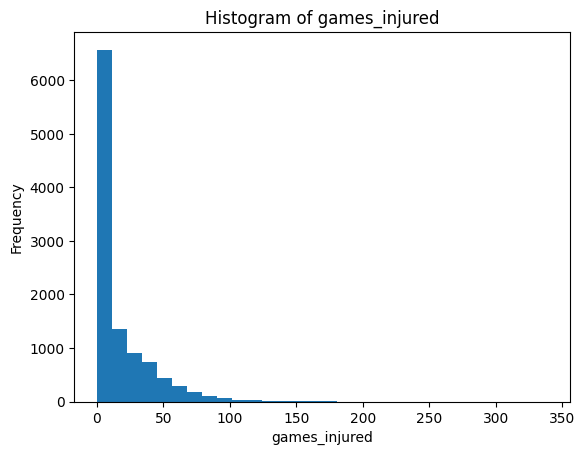

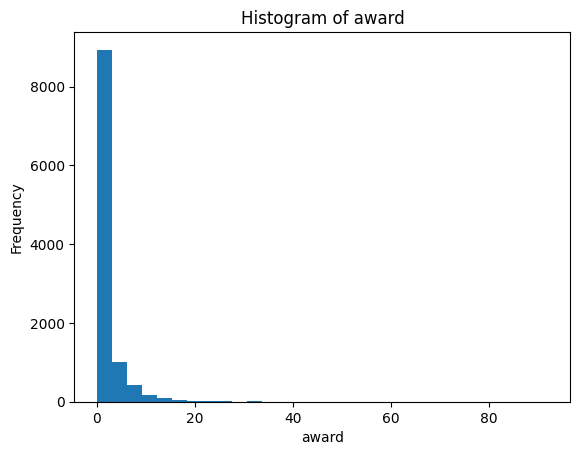

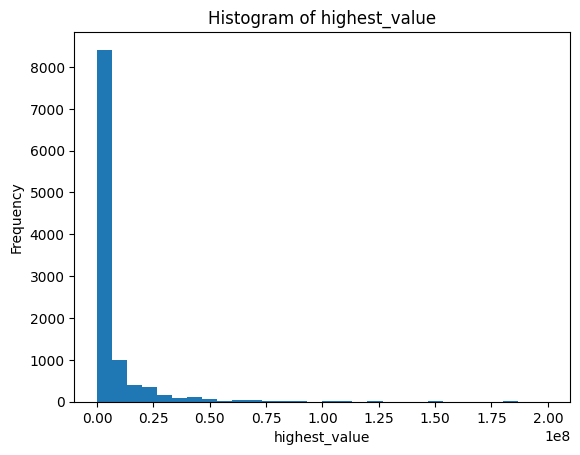

In [ ]:
# I need to see histogram for all the columns that showen in describe function:

columns_to_plot = ['appearance','goals','assists','minutes played','days_injured',
                   'games_injured','award','highest_value']
for column in columns_to_plot:
    plt.figure()  # Create a new figure for each histogram
    plt.hist(df[column], bins = 30)
    plt.title(f'Histogram of {column}')  # Set a title for the histogram
    plt.xlabel(column)  # Set x label
    plt.ylabel('Frequency')  # Set y label
    plt.show()  # Show plot

In [ ]:
df.columns

Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
       ...
       'team_Western Sydney Wanderers', 'team_Western United FC',
       'team_Wigan Athletic', 'team_Wolfsberger AC',
       'team_Wolverhampton Wanderers', 'team_Yokohama F. Marinos',
       'team_Yokohama FC', 'team_Zenit St. Petersburg', 'team_Ümraniyespor',
       'current_value_category'],
      dtype='object', length=407)

In [ ]:
# Calculate z-scores for 'appearance'
df['zscore_appearance'] = np.abs(zscore(df['appearance']))

# Remove outliers based on z-score threshold (e.g., z-score > 3)
threshold = 3
df = df[df['zscore_appearance'] <= threshold]

# Drop the temporary z-score column
df = df.drop('zscore_appearance', axis=1)


In [ ]:
df['zscore_assists'] = np.abs(zscore(df['assists']))

# Remove outliers based on z-score threshold (e.g., z-score > 3)
threshold = 3
df = df[df['zscore_assists'] <= threshold]

# Drop the temporary z-score column
df = df.drop('zscore_assists', axis=1)

In [ ]:
df['zscore_goals'] = np.abs(zscore(df['goals']))

# Remove outliers based on z-score threshold (e.g., z-score > 3)
threshold = 3
df = df[df['zscore_goals'] <= threshold]

# Drop the temporary z-score column
df = df.drop('zscore_goals', axis=1)

In [ ]:
df['zscore_minutes played'] = np.abs(zscore(df['minutes played']))

# Remove outliers based on z-score threshold (e.g., z-score > 3)
threshold = 3
df = df[df['zscore_minutes played'] <= threshold]

# Drop the temporary z-score column
df = df.drop('zscore_minutes played', axis=1)

In [ ]:
df['zscore_days_injured'] = np.abs(zscore(df['days_injured']))

# Remove outliers based on z-score threshold (e.g., z-score > 3)
threshold = 3
df = df[df['zscore_days_injured'] <= threshold]

# Drop the temporary z-score column
df = df.drop('zscore_days_injured', axis=1)

In [ ]:
df['zscore_games_injured'] = np.abs(zscore(df['games_injured']))

# Remove outliers based on z-score threshold (e.g., z-score > 3)
threshold = 3
df = df[df['zscore_games_injured'] <= threshold]

# Drop the temporary z-score column
df = df.drop('zscore_games_injured', axis=1)

In [ ]:
df['zscore_award'] = np.abs(zscore(df['award']))

# Remove outliers based on z-score threshold (e.g., z-score > 3)
threshold = 3
df = df[df['zscore_award'] <= threshold]

# Drop the temporary z-score column
df = df.drop('zscore_award', axis=1)

In [ ]:
df['zscore_highest_value'] = np.abs(zscore(df['highest_value']))

# Remove outliers based on z-score threshold (e.g., z-score > 3)
threshold = 3
df = df[df['zscore_highest_value'] <= threshold]

# Drop the temporary z-score column
df = df.drop('zscore_highest_value', axis=1)

In [ ]:
# # because I do not have high knowledage of football Iwill consider values that are
# #grater than 97 percentile as outlier.

# df= df[df['appearance']<=df['appearance'].quantile(0.95)]
# df= df[df['goals']<=df['goals'].quantile(0.97)]
# df= df[df['assists']<=df['assists'].quantile(0.95)]
# df= df[df['minutes played']<=df['minutes played'].quantile(0.95)]
# df= df[df['days_injured']<=df['days_injured'].quantile(0.95)]
# df= df[df['games_injured']<=df['games_injured'].quantile(0.95)]
# df= df[df['award']<=df['award'].quantile(0.95)]
# df= df[df['current_value']<=df['current_value'].quantile(0.95)]
# df= df[df['highest_value']<=df['highest_value'].quantile(0.95)]

In [ ]:
df.shape

(9721, 407)

Prepare train and test data

In [ ]:
# Prepare data
X = df.drop(['current_value_category'], axis=1)
y = df['current_value_category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVR #Import the SVR class
from sklearn.model_selection import GridSearchCV
## This statement allows the visuals to render within your Jupyter Notebook

In [ ]:
X.shape

(9721, 406)

## Buliding the Model

In [ ]:
model = LogisticRegression()

In [ ]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Predict and evaluate the model
y_pred_test = model.predict(X_test_scaled)

In [ ]:
# Each row of the model.coef_ matrix tells you how each feature affects being in the corresponding class versus any other class
coeff_df = pd.DataFrame(model.coef_[2],X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
height,-0.093558
age,-0.972565
appearance,0.141487
goals,0.205517
assists,0.081293
...,...
team_Wolverhampton Wanderers,0.003837
team_Yokohama F. Marinos,-0.104022
team_Yokohama FC,-0.085675
team_Zenit St. Petersburg,0.098870


In [ ]:
model.coef_

array([[ 0.0452267 ,  0.69098104, -0.54061654, ...,  0.01857215,
        -0.07376546,  0.11552287],
       [ 0.04833134,  0.28158357,  0.39912983, ...,  0.0671028 ,
        -0.02510457,  0.0241635 ],
       [-0.09355804, -0.97256461,  0.14148672, ..., -0.08567495,
         0.09887003, -0.13968637]])

In [ ]:
print(model.intercept_)

[-0.72842055  1.97921331 -1.25079275]


## Evaluating the Model

In [ ]:
# our benchmark model
base_model = round(df['current_value_category'].value_counts()[1]/df.shape[0]*100, 2)
base_model

41.14

1. Accuracy

In [ ]:
# Train score
y_pred_train = model.predict(X_train_scaled)
accuracy_Train = accuracy_score(y_train, y_pred_train)
accuracy_Train

0.7969393004115226

In [ ]:
# Test score
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_test

0.7470437017994859

- Confusion matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
conf_matrix

array([[557, 135,  12],
       [178, 554,  63],
       [  0, 104, 342]])

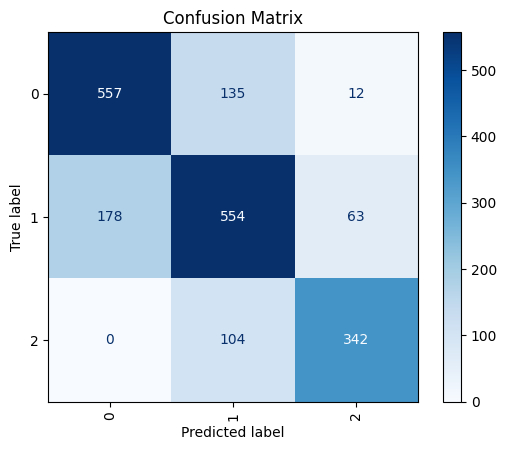

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

2. Precision

In [ ]:
# Train score
precision_train = precision_score(y_train, y_pred_train, average='macro')
print(f"Precision in train: {precision_train:.2f}")

# Test score
precision_test = precision_score(y_test, y_pred_test, average='macro')
print(f"Precision in test: {precision_test:.2f}")

Precision in train: 0.81
Precision in test: 0.76


3. Recall

In [ ]:
# Train score
recall_train = recall_score(y_train, y_pred_train, average='macro')
print(f"Recall in train: {recall_train:.2f}")

# Test score
recall_test = recall_score(y_test, y_pred_test, average='macro')
print(f"Recall in test: {recall_test:.2f}")

Recall in train: 0.80
Recall in test: 0.75


4. F1-Score

In [ ]:
# Train score
f1_train = f1_score(y_train, y_pred_train, average='macro')
print(f"f1-score in train: {f1_train:.2f}")

# Test score
f1_test = precision_score(y_test, y_pred_test, average='macro')
print(f"f1-score in test: {f1_test:.2f}")

f1-score in train: 0.80
f1-score in test: 0.76


- Classification report

In [ ]:
from sklearn.metrics import classification_report

print('Train report: ')
print(classification_report(y_train, y_pred_train))

print('Test report: ')
print(classification_report(y_test, y_pred_test))

Train report: 
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      2845
           1       0.75      0.77      0.76      3204
           2       0.86      0.80      0.83      1727

    accuracy                           0.80      7776
   macro avg       0.81      0.80      0.80      7776
weighted avg       0.80      0.80      0.80      7776

Test report: 
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       704
           1       0.70      0.70      0.70       795
           2       0.82      0.77      0.79       446

    accuracy                           0.75      1945
   macro avg       0.76      0.75      0.75      1945
weighted avg       0.75      0.75      0.75      1945

